In [1]:
%matplotlib widget
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import gammaincc

In [2]:
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")
plt.style.use("dark_background")

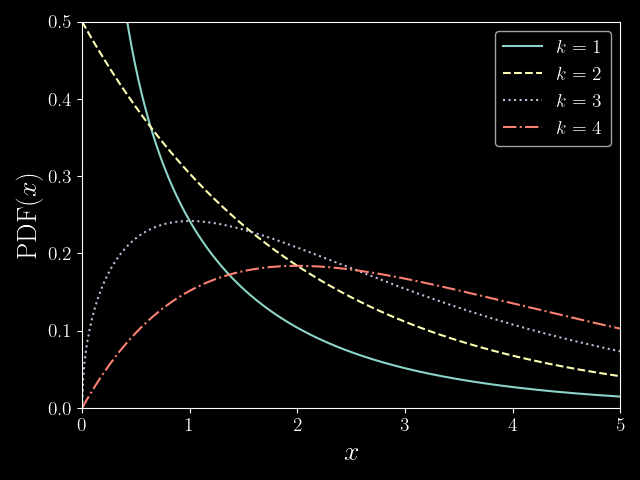

In [3]:
xvals = np.linspace(0, 10, num=1000)
chi2_1 = stats.chi2(1)
yvals1 = chi2_1.pdf(xvals)
chi2_2 = stats.chi2(2)
yvals2 = chi2_2.pdf(xvals)
chi2_3 = stats.chi2(3)
yvals3 = chi2_3.pdf(xvals)
chi2_4 = stats.chi2(4)
yvals4 = chi2_4.pdf(xvals)

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, yvals1, label="$k = 1$")
ax.plot(xvals, yvals2, label="$k = 2$", linestyle="--")
ax.plot(xvals, yvals3, label="$k = 3$", linestyle=":")
ax.plot(xvals, yvals4, label="$k = 4$", linestyle="-.")
ax.set_xlim((0, 5))
ax.set_ylim((0, 0.5))
ax.legend(fontsize=14)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$\mathrm{PDF}(x)$", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=14)
plt.tight_layout()
fig.savefig("chi2.pdf", bbox_inches="tight", transparent=True)
plt.show()

# Linear Regression Redux

In [4]:
# generate x and y data, with uncertainties
rng = np.random.default_rng()
NDATA = 100
slope = -1.3
intercept = 3.4
xvals = rng.uniform(-5, 5, size=(NDATA,))
y_random = rng.uniform(-0.5, 0.5, size=(NDATA,))
yvals = slope * xvals + intercept + y_random
y_uncertainty = rng.uniform(0.1, 2, size=(NDATA,))

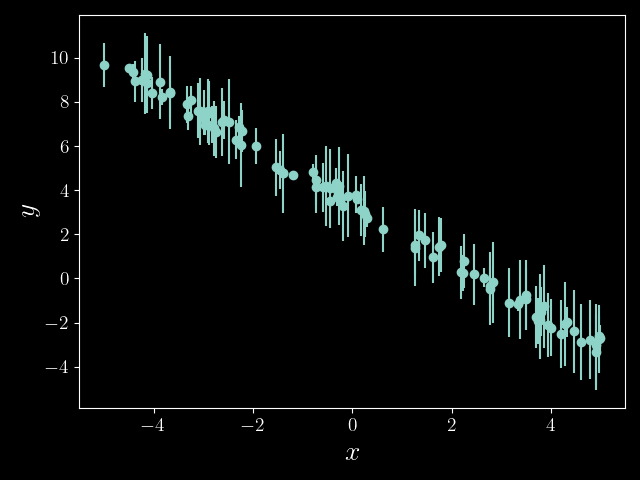

In [5]:
# plot
fig = plt.figure()
ax = plt.gca()
ax.errorbar(xvals, yvals, y_uncertainty, linestyle="", marker="o")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=14)
plt.tight_layout()
plt.show()

In [6]:
# calculate slope and intercept using maximum-likelihood estimation
s_val = np.sum(1 / y_uncertainty**2)
sx_val = np.sum(xvals / y_uncertainty**2)
sy_val = np.sum(yvals / y_uncertainty**2)
sxx_val = np.sum(xvals**2 / y_uncertainty**2)
sxy_val = np.sum(xvals * yvals / y_uncertainty**2)

delta = s_val * sxx_val - sx_val**2
aval = (sxx_val * sy_val - sx_val * sxy_val) / delta
bval = (s_val * sxy_val - sx_val * sy_val) / delta

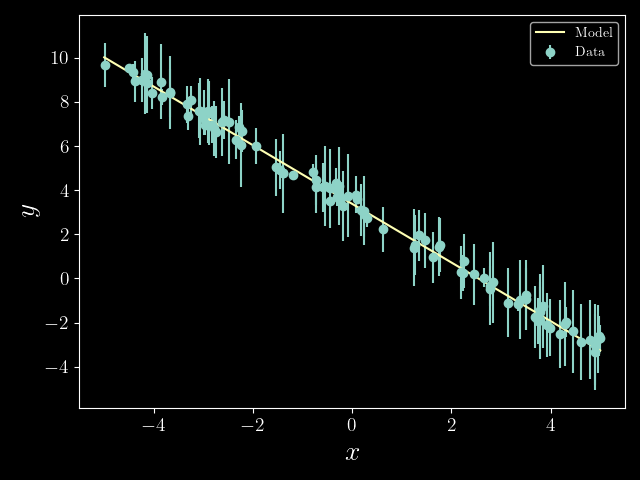

In [7]:
# compare "real data" with model
xmodel = np.linspace(-5, 5, num=1000)
ymodel = bval * xmodel + aval

fig = plt.figure()
ax = plt.gca()
ax.errorbar(xvals, yvals, y_uncertainty, linestyle="", marker="o", label="Data")
ax.plot(xmodel, ymodel, label="Model")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=14)
ax.legend(loc=0)
plt.tight_layout()
plt.show()

In [8]:
# calculate degrees of freedom
dof = NDATA - 2  # number of data points minus number of parameters
chi2 = np.sum(((yvals - aval - bval * xvals) / y_uncertainty)**2)
reduced_chi2 = chi2 / dof
print(f"reduced chi-square: {reduced_chi2:0.3f}")

reduced chi-square: 0.284


# What if we had a bad model?

In [9]:
# generate x and y data, with uncertainties
rng = np.random.default_rng()
NDATA = 100
slope = -1.3
intercept = 3.4
xvals2 = rng.uniform(-5, 5, size=(NDATA,))
y_random2 = rng.uniform(-0.5, 0.5, size=(NDATA,))
yvals2 = slope * xvals2**2 + intercept + y_random2
y_uncertainty2 = rng.uniform(0.1, 2, size=(NDATA,))

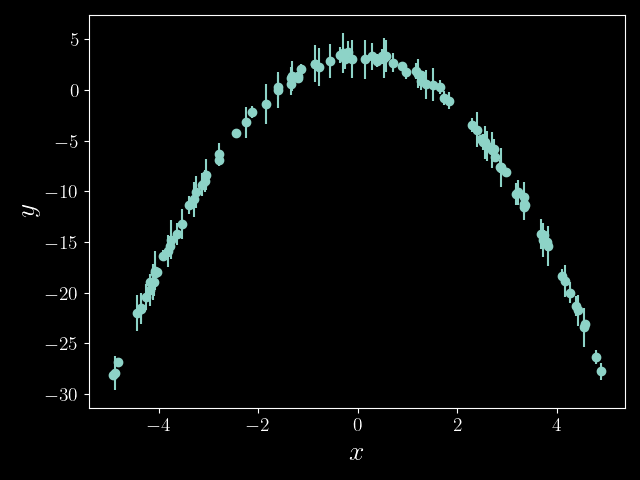

In [10]:
# plot
fig = plt.figure()
ax = plt.gca()
ax.errorbar(xvals2, yvals2, y_uncertainty2, linestyle="", marker="o")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=14)
plt.tight_layout()
plt.show()

In [11]:
# calculate slope and intercept using maximum-likelihood estimation
s_val2 = np.sum(1 / y_uncertainty2**2)
sx_val2 = np.sum(xvals2 / y_uncertainty2**2)
sy_val2 = np.sum(yvals2 / y_uncertainty2**2)
sxx_val2 = np.sum(xvals**2 / y_uncertainty2**2)
sxy_val2 = np.sum(xvals2 * yvals2 / y_uncertainty2**2)

delta2 = s_val2 * sxx_val2 - sx_val2**2
aval2 = (sxx_val2 * sy_val2 - sx_val2 * sxy_val2) / delta2
bval2 = (s_val2 * sxy_val2 - sx_val2 * sy_val2) / delta2

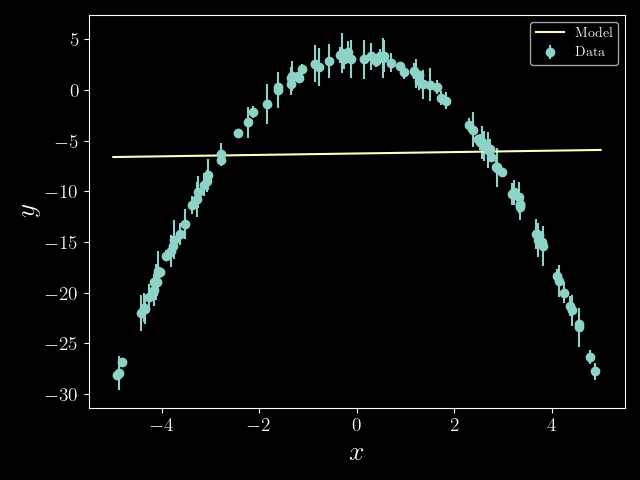

In [12]:
# compare "real data" with model
xmodel2 = np.linspace(-5, 5, num=1000)
ymodel2 = bval2 * xmodel2 + aval2

fig = plt.figure()
ax = plt.gca()
ax.errorbar(xvals2, yvals2, y_uncertainty2, linestyle="", marker="o", label="Data")
ax.plot(xmodel2, ymodel2, label="Model")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=14)
ax.legend(loc=0)
plt.tight_layout()
plt.show()

In [13]:
# calculate degrees of freedom
dof2 = NDATA - 2  # number of data points minus number of parameters
chi22 = np.sum(((yvals2 - aval - bval * xvals2) / y_uncertainty2)**2)
reduced_chi22 = chi22 / dof2
print(f"reduced chi-square: {reduced_chi22:0.3f}")

reduced chi-square: 638.851


# Putting it all together

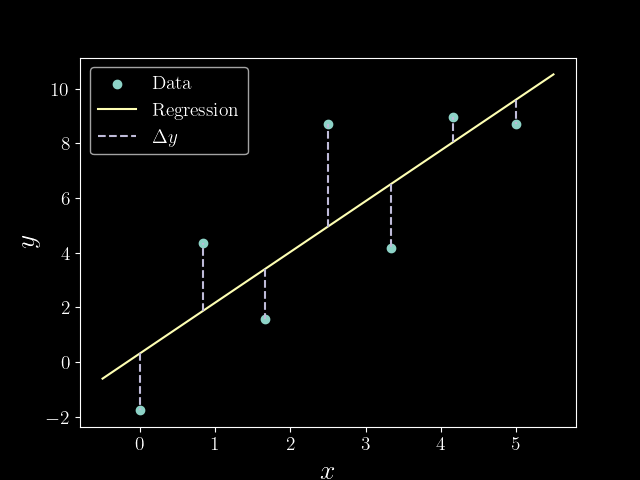

In [14]:
rng = np.random.default_rng(140)

# generate data points
xpoints = np.linspace(0, 5, num=7)
ypoints = 2 * xpoints + rng.normal(loc=0.0, scale=1.5, size=len(xpoints))

fig = plt.figure()
ax = plt.gca()
ax.scatter(xpoints, ypoints, label="Data")

# perform linear regression
result = stats.linregress(xpoints, ypoints)

xplot = np.linspace(-0.5, 5.5, num=1000)
yplot = result.slope * xplot + result.intercept
ax.plot(xplot, yplot, color="C1", label="Regression")

# plot distances to minimize
for i, (xv, yv) in enumerate(zip(xpoints, ypoints)):
    y0 = xv * result.slope + result.intercept
    if i == 0:
        ax.plot((xv, xv), (y0, yv), linestyle="--", color="C2", label="$\Delta y$")
    else:
        ax.plot((xv, xv), (y0, yv), linestyle="--", color="C2")
    
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, prop={"size": 14})

fig.savefig("linregress.pdf", bbox_inches="tight", transparent=True)

In [15]:
def compute_lin_regress(xvals, yvals, svals=None):
    """
    Compute a linear regression given data and optionally uncertainties.
    
    This function assumes a linear functional form of a model, where
        y(x) = a + b * x.
    The goal is to find the values of `a` and `b` that best fit the data,
    their associated uncertainties, the covariance between thenm, and optionally
    the goodness-of-fit parameter Q.
    
    Parameters
    ----------
    xvals : 1d numpy array
        A one-dimensional array of input values corresponding to the independent variables.
    yvals : 1d numpy array
        A one-dimensional array of input values corresopnding to the dependent variables.
        These should match `xvals` pair-wise.
    svals : 1d numpy array, optional
        The associated 1-sigma uncertainties for `yvals`. If not provided, the fit is still
        performed, but some quantities are adjusted, and the goodness-of-fit parameter Q is
        not computed.
        
    Returns
    -------
    results : dict
        A dictionary containing the results. The keys are: "a" (constant term), "b" (slope),
        "chi2" (the chi-square value of the fit), "sigma_a" (the 1-sigma uncertainty on a),
        "sigma_b" (the 1-sigma uncertainty on b), "cov" (the covariance between uncertainties
        of a and b), "r" (the cross-correlation coefficient), and optionally "Q"
        (goodness-of-fit parameter). Note that "Q" is only included if `svals` is provided.
    """
    n = len(xvals)
    if n <= 2:
        raise ValueError("Need at least 3 points to compute regression")
    if len(yvals) != n:
        raise ValueError("x and y must have the same length")

    if svals is None:
        svals = np.ones_like(xvals)
        have_s = False
    else:
        if len(svals) != n:
            raise ValueError("sigma must have the same length as x and y")
        have_s = True
    s = np.sum(1.0 / svals**2)
    sx = np.sum(xvals / svals**2)
    sy = np.sum(yvals / svals**2)
    sxx = np.sum(xvals**2 / svals**2)
    sxy = np.sum(xvals * yvals / svals**2)
    
    delta = s * sxx - sx**2

    # compute our values of a and b; save in a dict
    results = {}
    a = (sxx * sy - sx * sxy) / delta
    b = (s * sxy - sx * sy) / delta
    results["a"] = a
    results["b"] = b
    
    # compute chi-square
    chi2 = np.sum(((yvals - a - b * xvals) / svals)**2)
    results["chi2"] = chi2

    # compute uncertainty on a and b
    sigma_a = np.sqrt(sxx / delta)
    sigma_b = np.sqrt(s / delta)
    # correct in case we don't have external uncertainty
    if not have_s:
        sigma_a *= np.sqrt(chi2 / (n - 2))
        sigma_b *= np.sqrt(chi2 / (n - 2))
    results["sigma_a"] = sigma_a
    results["sigma_b"] = sigma_b
    
    # compute covariance + cross-correlation coefficient
    cov = - sx / delta
    results["cov"] = cov
    r = -sx / np.sqrt(s * sxx)
    results["r"] = r
    
    # maybe compute goodness-of-fit
    if have_s:
        q = gammaincc((n - 2) / 2, chi2 / 2)
        results["q"] = q

    return results

In [16]:
my_results = compute_lin_regress(xpoints, ypoints)
print("a: ", my_results["a"])
print("b: ", my_results["b"])

a:  0.32522878786104165
b:  1.8547381309338637


In [17]:
# compare with the "official" results from scipy
print("a (scipy): ", result.intercept)
print("b (scipy): ", result.slope)

print("a, relative error: ", (my_results["a"] - result.intercept) / result.intercept)
print("a, relative error: ", (my_results["b"] - result.slope) / result.slope)

a (scipy):  0.32522878786104137
b (scipy):  1.8547381309338635
a, relative error:  8.534169376017193e-16
a, relative error:  1.1971749608298154e-16


# Incorporating Uncertainty

Suppose now that I know the values of some of my data points better than others. Adding uncertainty is relatively straightfoward. First, let's visualize:

In [18]:
svals = rng.uniform(0.5, 2, size=len(xpoints))

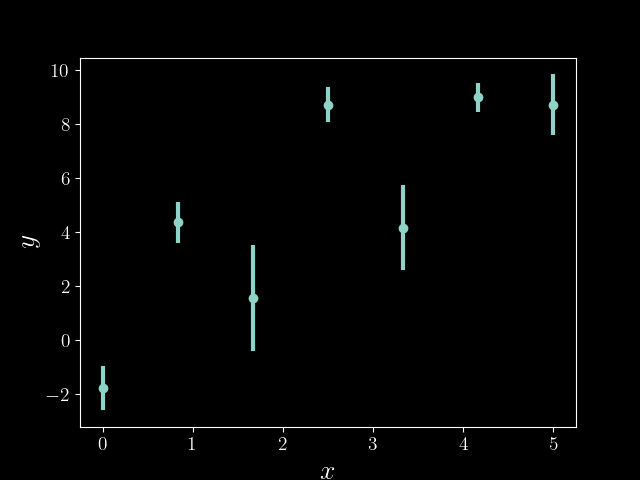

In [19]:
fig = plt.figure()
ax = plt.gca()
ax.errorbar(xpoints, ypoints, yerr=svals, linestyle="", marker="o", linewidth=3)

ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("uncertainty.pdf", bbox_inches="tight", transparent=True)

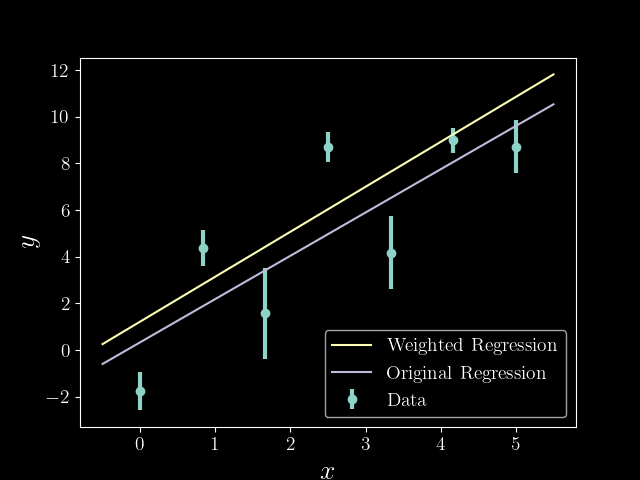

In [20]:
my_results2 = compute_lin_regress(xpoints, ypoints, svals)

fig = plt.figure()
ax = plt.gca()
ax.errorbar(xpoints, ypoints, yerr=svals, linestyle="", marker="o", linewidth=3, label="Data")

xplot = np.linspace(-0.5, 5.5, num=1000)
yplot = my_results2["b"] * xplot + my_results2["a"]
ax.plot(xplot, yplot, color="C1", label="Weighted Regression")

xplot = np.linspace(-0.5, 5.5, num=1000)
yplot = my_results["b"] * xplot + my_results["a"]
ax.plot(xplot, yplot, color="C2", label="Original Regression")

ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, prop={"size": 14})

fig.savefig("uncertainty_regress.pdf", bbox_inches="tight", transparent=True)

In [21]:
# Goodness of fit
print("goodness-of-fit:")
print(my_results2["q"])

goodness-of-fit:
1.4684469279510467e-08


# Larger Error Bars

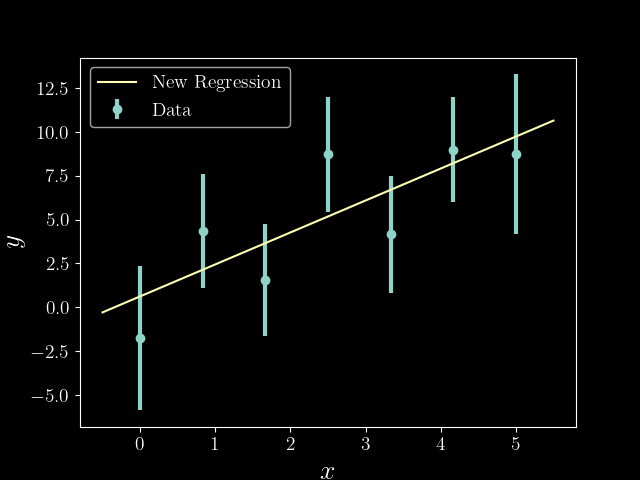

In [22]:
svals2 = rng.uniform(3, 5, size=len(xpoints))

my_results3 = compute_lin_regress(xpoints, ypoints, svals2)

fig = plt.figure()
ax = plt.gca()
ax.errorbar(xpoints, ypoints, yerr=svals2, linestyle="", marker="o", linewidth=3, label="Data")

xplot = np.linspace(-0.5, 5.5, num=1000)
yplot = my_results3["b"] * xplot + my_results3["a"]
ax.plot(xplot, yplot, color="C1", label="New Regression")

ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, prop={"size": 14})

fig.savefig("uncertainty_regress2.pdf", bbox_inches="tight", transparent=True)

In [23]:
print("new goodness-of-fit:")
print(my_results3["q"])

new goodness-of-fit:
0.6871076205798555


# Non-Linear Least Squares

In [24]:
tvals = rng.uniform(0, 2 * np.pi, size=(100,))
noise = rng.normal(loc=0.0, scale=0.5, size=(100,))
amp = 3.2
omega = 1.2
phi = 0.5
posvals = amp * np.cos(omega * tvals + phi) + noise

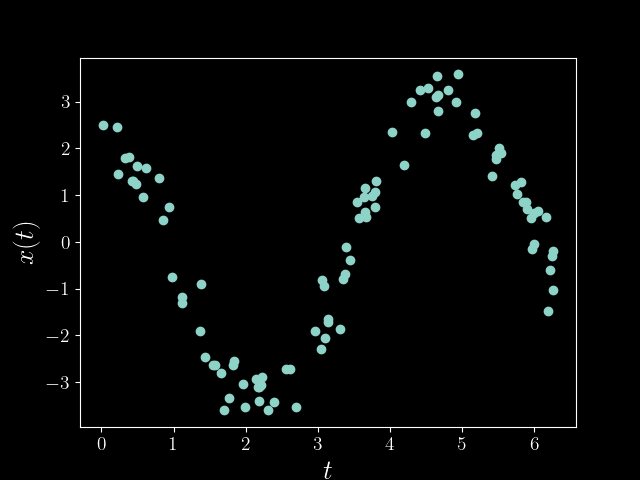

In [25]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(tvals, posvals)
ax.set_xlabel("$t$", fontsize=20)
ax.set_ylabel("$x(t)$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("sho.pdf", bbox_inches="tight", transparent=True)

The function we'd like to fit is:
$$
x(t) = A\cos(\omega t + \phi)
$$

In [26]:
# perform non-linear least squares fitting
from scipy.optimize import curve_fit

def f(x, am, om, ph):
    return am * np.cos(om * x + ph)

popt, pcov = curve_fit(f, tvals, posvals)
print(popt)

[3.19149457 1.21103937 0.49639062]


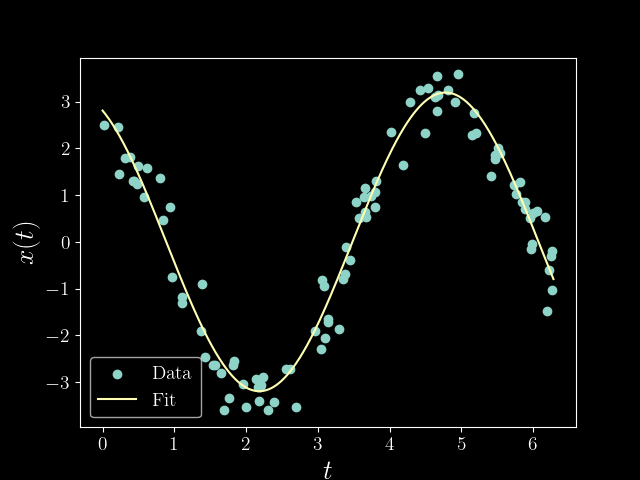

In [27]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(tvals, posvals, label="Data")

xinterp = np.linspace(0, 2 * np.pi, num=1000)
ax.plot(xinterp, f(xinterp, *popt), color="C1", label="Fit")

ax.set_xlabel("$t$", fontsize=20)
ax.set_ylabel("$x(t)$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, prop={"size": 14})

fig.savefig("sho_fit.pdf", bbox_inches="tight", transparent=True)